In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import csv

In [2]:
# sign_mnist_train.csv
!gdown 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 209MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 188MB/s]


In [3]:
def parse_data_from_input(filename):
  with open(filename) as file:
    csv_reader = csv.reader(file, delimiter=',')

    labels = []
    images = []

    for i, row in enumerate(csv_reader):
       if i > 0:
        labels.append(row[0])
        images.append(row[1:])

    images = np.array(images, dtype=np.float64)
    labels = np.array(labels, dtype=np.float64)

    images = images.reshape(images.shape[0], 28, 28 )

    ### END CODE HERE

    return images, labels

In [4]:
training_images, training_labels = parse_data_from_input("./sign_mnist_train.csv")
validation_images, validation_labels = parse_data_from_input("./sign_mnist_test.csv")

print(f"Training images has shape: {training_images.shape}")
print(f"Training labels has shape: {training_labels.shape}")
print(f"Validation images has shape: {validation_images.shape}")
print(f"Validation labels has shape: {validation_labels.shape}")

Training images has shape: (27455, 28, 28)
Training labels has shape: (27455,)
Validation images has shape: (7172, 28, 28)
Validation labels has shape: (7172,)


In [18]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
    training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
    validation_images = validation_images.reshape(validation_images.shape[0], validation_images.shape[1], validation_images.shape[2], 1)

    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest'
    )


    train_generator = train_datagen.flow(x=training_images,
                                        y=training_labels,
                                        batch_size=128)


    validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

    validation_generator = validation_datagen.flow(x=validation_images,
                                                    y=validation_labels,
                                                    batch_size=128)
    return train_generator, validation_generator

In [19]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

In [23]:
def create_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(2,2),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(25, activation='softmax')
    ]
  )

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

In [24]:
model = create_model()

In [25]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator, callbacks = [learning_rate_reduction])

Epoch 1/25
215/215 [==============================] - 14s 50ms/step - loss: 1.2320 - acc: 0.6074 - val_loss: 4.1851 - val_acc: 0.0694 - lr: 0.0010
Epoch 2/25
215/215 [==============================] - 10s 47ms/step - loss: 0.3100 - acc: 0.8958 - val_loss: 1.9408 - val_acc: 0.4509 - lr: 0.0010
Epoch 3/25
215/215 [==============================] - 11s 51ms/step - loss: 0.1718 - acc: 0.9446 - val_loss: 0.1588 - val_acc: 0.9522 - lr: 0.0010
Epoch 4/25
215/215 [==============================] - 10s 49ms/step - loss: 0.1136 - acc: 0.9631 - val_loss: 0.1696 - val_acc: 0.9469 - lr: 0.0010
Epoch 5/25
215/215 [==============================] - ETA: 0s - loss: 0.0900 - acc: 0.9707
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 10s 48ms/step - loss: 0.0900 - acc: 0.9707 - val_loss: 0.2475 - val_acc: 0.9264 - lr: 0.0010
Epoch 6/25
215/215 [==============================] - 10s 47ms/step - loss: 0.0513 - acc: 0.9835 - val_loss: 

In [26]:
print(history.history)

{'loss': [1.2319525480270386, 0.3099857568740845, 0.1717970371246338, 0.11359187960624695, 0.09002232551574707, 0.051284123212099075, 0.04166768118739128, 0.03699137642979622, 0.021223189309239388, 0.019229616969823837, 0.020246336236596107, 0.01550277043133974, 0.015985656529664993, 0.012186736799776554, 0.01172664761543274, 0.011694090440869331, 0.010371951386332512, 0.012235024943947792, 0.01061808317899704, 0.009814354591071606, 0.00992689747363329, 0.009305575862526894, 0.011449204757809639, 0.009513105265796185, 0.010901650413870811], 'acc': [0.6074303388595581, 0.895756721496582, 0.9446367025375366, 0.9631397128105164, 0.9706792831420898, 0.9835367202758789, 0.9872882962226868, 0.9885631203651428, 0.9934073686599731, 0.9947914481163025, 0.9935895204544067, 0.995410680770874, 0.9949735999107361, 0.9960298538208008, 0.9963212609291077, 0.9961391091346741, 0.9967583417892456, 0.9963940978050232, 0.996576189994812, 0.9968675971031189, 0.9969768524169922, 0.9970496892929077, 0.996685

In [27]:
import matplotlib.pyplot as plt

In [28]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

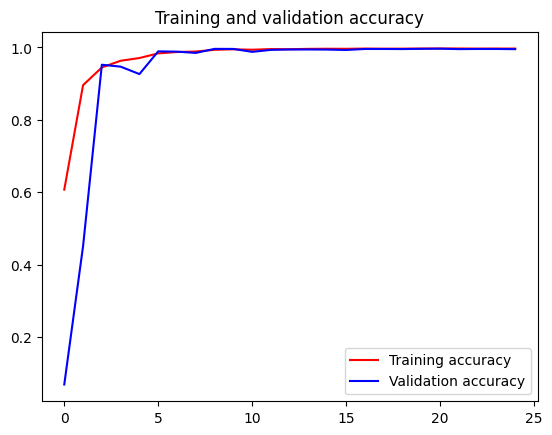

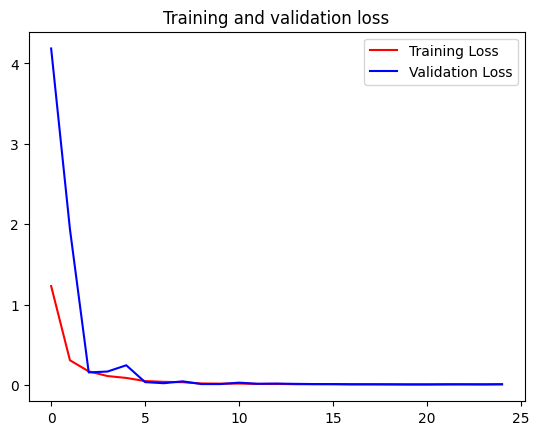

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()